In [ ]:
Task: 
Use SVM to classify emails into two categories (spam or not). 
Report the classification accuracy for various SVM kernel functions (e.g., Linear, Quadratic, RBF) and parameters. 
(that you think are important).
3 Bonus Points if you also compare SVM with another classifier of your choice.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("spambase.data", header=None)
email_rec = dataset

In [3]:
email_rec.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# setting the column headers
email_rec.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]

In [5]:
email_rec.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
email_rec.shape

(4601, 58)

In [ ]:
The data set contains about 4601 email instances where each is represented by various features, such as occurrence frequency of certain keywords, length of capitalized words etc. 
The last column of the dataset denotes whether the e-mail was considered spam (1) or not (0)

In [8]:
# checking for missing values in the dataset 
email_rec.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [133]:
# checking to verify all data type are float
email_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [145]:
#summary of each feature
email_rec.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [135]:
email_rec.spam.value_counts()

0    2788
1    1813
Name: spam, dtype: int64

In [136]:
spam =(1813/(1813+2788))
print("The percentage of spam emails is: {:.2f} %".format(spam*100))

The percentage of spam emails is: 39.40 %


## Data Preparation and pre-processing

In [ ]:
My approach is as follows:
- split the data into training and testing set
- feature scaling of the variables to get data on similar scale 
- fit preliminary model SVM models
- hyper-parameter tuning 
- fitting final SVM model
- Fitting a random forrest for comparison
- comparing final models

In [9]:
# splitting data into X and y
X = email_rec.iloc[:, :-1].values
y = email_rec.iloc[:, -1].values

#### split data into training and test set

In [10]:
# 75% of the data set as training data and the remaining as test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)

#### feature scaling where necessary (ie Standardize data set)

In [11]:
#applying feature scaling to X features to get data on similar scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building

In [ ]:
We build an SVM model using various SVM kernel functions (Linear, RBF and Sigmoid).
Note that the 3 SVM Models below use a parameter C which has a default value of 1.0

In [ ]:
# building of SVM model using RBf kernel function and check accuracy using confusion matrix

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[679  31]
 [ 52 389]]


0.9278887923544744

In [ ]:
# building of SVM model using linear kernel function and check accuracy using confusion matrix

In [148]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[673  37]
 [ 50 391]]


0.9244135534317984

In [ ]:
# building of SVM model using sigmoid kernel function and check accuracy using confusion matrix

In [150]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[634  76]
 [ 72 369]]


0.8714161598609904

In [ ]:
#Graph to compare various SVM kernel functions (Linear, Sigmoid, RBF)

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

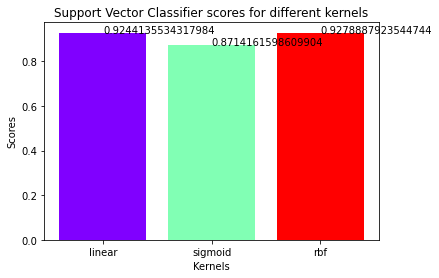

In [151]:
from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'sigmoid', 'rbf']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

#Once I had the scores for each, I used the rainbow method to select different colors for each bar and plot a bar graph of the scores achieved by each.
from matplotlib.cm import rainbow
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [ ]:
From the comparison of the graphs above, the SVM models with linear and RBF kernels are 
clearly better so i would perform parameter tuning using this options

### Finding Optimal Hyperparameter C & Best SVM Model

In [ ]:
In this approach, i use the k-fold cross validation to compute the optimal value of the hyperparameter C (cost) as 
well as choose the best model option between the kernels rbf and linear.
This is done using the GridSearchCV() method.

In [152]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']}, 
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}] #trying various regularization parameters and also gamma params for the kernel svm rbf version
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train) #this gets accuracies of all combinations above
best_accuracy = grid_search.best_score_ #gets the one with best accuracy from all combinations
best_parameters = grid_search.best_params_ #gives us which score gives us accuracy above
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 93.01 %
Best Parameters: {'C': 1, 'kernel': 'linear'}


In [ ]:
From the Grid search results,
The optimal value of the hyperparameter C is 1 and the best kernel selected is linear

### Fit final SVM model

In [ ]:
The optimal value of the hyperparameter C is 1 and the best kernel selected is linear
Our final SVM linear model would be built using C=1 

In [153]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C= 1, random_state = 0)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[673  37]
 [ 50 391]]


0.9244135534317984

In [155]:
# print performance metrics
from sklearn import metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

# specificity
print("specificity", 811/(811+38))

accuracy 0.9244135534317984
precision 0.9135514018691588
recall 0.8866213151927438
specificity 0.9552414605418139


In [ ]:
#Fitting final model with K-Fold Cross Validation to get a sense of the average metrics

In [156]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

#k fold application
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10) #of folds is 10 from this
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

#all acuracies fall b/n 93% +-0.75%

Accuracy: 93.01 %
Standard Deviation: 0.79 %


In [ ]:
The final SVM gives approximately the following results:
- an accuracy of 92%, 
- sensitivity/recall of 89%.
- precision of 91%
- specificity of 96%

Using a 10-Fold Cross Validation, we get an average accuracy of 93% which confirms the model fitted works well indeed

## Second Model: Random Forest

In [ ]:
The random forest model is fitted with the number of trees in a forest set to be 100.
The “entropy” criteria was used to measure the quality of a split. 
“entropy” in this case is determining the information gain.

In [159]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[689  21]
 [ 36 405]]


0.950477845351868

In [ ]:
#Fitting random forest model with K-Fold Cross Validation to get a sense of the average metrics

In [160]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10) #of folds is 10 from this
print (accuracies)
print("'Cross-Validation Accuracy Scores': {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[0.95652174 0.94492754 0.95072464 0.96231884 0.93913043 0.95362319
 0.94492754 0.96231884 0.95652174 0.95362319]
'Cross-Validation Accuracy Scores': 95.25 %
Standard Deviation: 0.72 %


In [ ]:
The random forrest has an accuracy of about 95%
Using a 10-Fold Cross Validation, we get an average accuracy of 95% which confirms the model fitted, 
produces that accuarcy on average.

### Conclusion

In [ ]:
Both SVM (accuaracy=93%) and random forrest(accuaracy=95%) models produce impressive results with accurcies higher than 90%.
However, the random forest model slightly edges out the SVM model with an accuracy of 95%.